### 한글 폰트를 사용하기 위한 설정

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# %config InlineBackend.figure_format = 'retina'
# !apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)

plt.rc('font', family='NanumBarunGothic')
mpl.rcParams['axes.unicode_minus'] = False
# mpl.font_manager._rebuild()

### 사용할 라이브러리 import

In [2]:
import pickle
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('seaborn')

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### baseline labeling

In [3]:
def preprocessing_dataset(dataset, label_type):
    label = []
    for i in dataset[8]:
        if i == 'blind':
            label.append(100)
        else:
            label.append(label_type[i])
    out_dataset = pd.DataFrame({'1': dataset[1], '2': dataset[2], '3': dataset[3], '4': dataset[4], '5': dataset[5], '6': dataset[6], '7': dataset[7], '8': dataset[8]})
    return out_dataset

In [4]:
def load_data(dataset_dir):
  # load label_type, classes
  with open('/opt/ml/input/data/label_type.pkl', 'rb') as f:
    label_type = pickle.load(f)
  # load dataset
  dataset = pd.read_csv(dataset_dir, delimiter='\t', header=None)
  # preprecessing dataset
  dataset = preprocessing_dataset(dataset, label_type)
  
  return dataset

In [5]:
df_train = load_data('/opt/ml/input/data/train/train.tsv')

In [6]:
with open('/opt/ml/input/data/label_type.pkl', 'rb') as f:
    label_type = pickle.load(f)
label_type

{'관계_없음': 0,
 '인물:배우자': 1,
 '인물:직업/직함': 2,
 '단체:모회사': 3,
 '인물:소속단체': 4,
 '인물:동료': 5,
 '단체:별칭': 6,
 '인물:출신성분/국적': 7,
 '인물:부모님': 8,
 '단체:본사_국가': 9,
 '단체:구성원': 10,
 '인물:기타_친족': 11,
 '단체:창립자': 12,
 '단체:주주': 13,
 '인물:사망_일시': 14,
 '단체:상위_단체': 15,
 '단체:본사_주(도)': 16,
 '단체:제작': 17,
 '인물:사망_원인': 18,
 '인물:출생_도시': 19,
 '단체:본사_도시': 20,
 '인물:자녀': 21,
 '인물:제작': 22,
 '단체:하위_단체': 23,
 '인물:별칭': 24,
 '인물:형제/자매/남매': 25,
 '인물:출생_국가': 26,
 '인물:출생_일시': 27,
 '단체:구성원_수': 28,
 '단체:자회사': 29,
 '인물:거주_주(도)': 30,
 '단체:해산일': 31,
 '인물:거주_도시': 32,
 '단체:창립일': 33,
 '인물:종교': 34,
 '인물:거주_국가': 35,
 '인물:용의자': 36,
 '인물:사망_도시': 37,
 '단체:정치/종교성향': 38,
 '인물:학교': 39,
 '인물:사망_국가': 40,
 '인물:나이': 41}

In [7]:
df_train.head()

,1,2,3,4,5,6,7,8
0,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,30,33,자동차,19,21,단체:제작
1,"선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...",민주당,5,7,27석,42,44,관계_없음
2,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,유럽 축구 연맹,0,7,UEFA,9,12,단체:별칭
3,"용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...",강수일,24,26,공격수,3,5,인물:직업/직함
4,람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...,람캄행,0,2,퍼쿤 씨 인트라팃,32,40,인물:부모님


### label 분포

In [8]:
print('관계 없음', df_train['8'].str.contains(r'(^관계_없음)').sum())
print('인물', df_train['8'].str.contains(r'(^인물)').sum())
print('단체', df_train['8'].str.contains(r'(^단체)').sum())

관계 없음 4432
인물 2449
단체 2119


In [9]:
df_train['8'].value_counts()

관계_없음          4432
단체:구성원          815
인물:소속단체         683
인물:직업/직함        553
단체:상위_단체        335
단체:별칭           231
인물:출신성분/국적      209
인물:동료           186
단체:제작           171
인물:부모님          164
단체:본사_도시        135
단체:본사_국가        115
인물:별칭           103
인물:배우자           92
인물:자녀            84
단체:하위_단체         79
단체:창립일           67
인물:기타_친족         58
인물:제작            56
인물:형제/자매/남매      52
단체:창립자           45
인물:사망_일시         45
단체:모회사           44
인물:출생_일시         36
인물:거주_국가         27
인물:거주_도시         26
단체:본사_주(도)       23
단체:정치/종교성향       18
단체:해산일           15
인물:종교            15
인물:거주_주(도)       12
단체:주주            11
인물:용의자           11
인물:학교             9
단체:구성원_수          9
인물:출생_국가          8
인물:사망_원인          7
단체:자회사            6
인물:나이             5
인물:출생_도시          4
인물:사망_도시          3
인물:사망_국가          1
Name: 8, dtype: int64

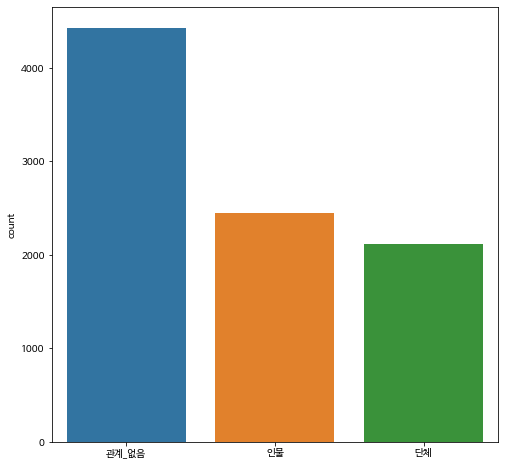

In [10]:
df_train['8'] = df_train['8'].replace("^인물:.+", '인물', regex=True)
df_train['8'] = df_train['8'].replace("^단체:.+", '단체', regex=True)


sns.countplot(df_train['8'], order=df_train['8'].value_counts().index)
fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.xlabel('')
plt.show()

In [11]:
def preprocessing_dataset(dataset, label_type):
    label = []
    for i in dataset[8]:
        if i == 'blind':
            label.append(100)
        else:
            label.append(label_type[i])
    out_dataset = pd.DataFrame({'sentence':dataset[1],'entity_01':dataset[2],'entity_02':dataset[5],'label':label,})
    return out_dataset

In [12]:
df_train = load_data('/opt/ml/input/data/train/train.tsv')

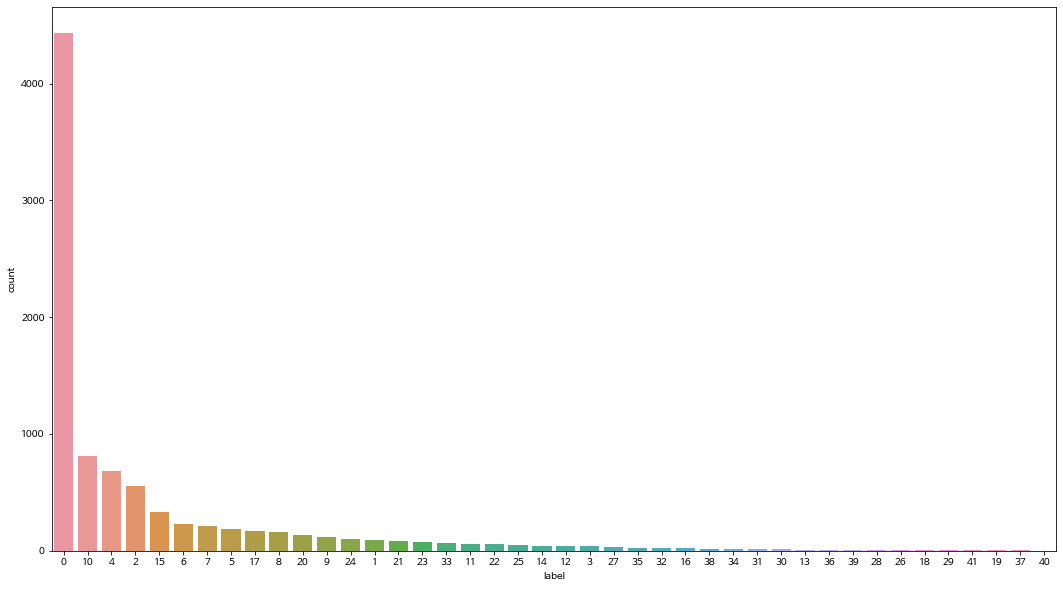

In [13]:
sns.countplot(df_train['label'], order=df_train['label'].value_counts().index)
fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.show()

In [14]:
df_train.head()

,sentence,entity_01,entity_02,label
0,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,자동차,17
1,"선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...",민주당,27석,0
2,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,유럽 축구 연맹,UEFA,6
3,"용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...",강수일,공격수,2
4,람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...,람캄행,퍼쿤 씨 인트라팃,8


In [15]:
length = df_train['sentence'].map(lambda x: len(x))

print('Min length in sentence:', length.min())
print('Max length in sentence:', length.max())
print('Average length in sentence:', length.mean())

Min length in sentence: 15
Max length in sentence: 510
Average length in sentence: 99.3458888888889
